# 2) Salary_hike -> Build a prediction model for Salary_hike

## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
df.rename(columns = {'YearsExperience':'exp', 'Salary':'sal'}, inplace = True)

In [7]:
df.shape

(30, 2)

30 entries with one independent column 'exp' and one dependent column sal

<Axes: xlabel='exp', ylabel='sal'>

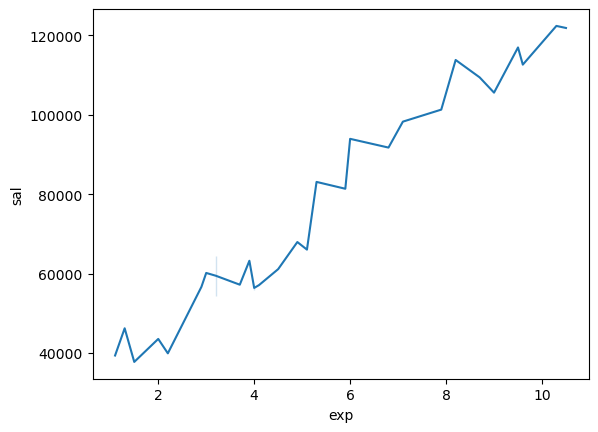

In [10]:
sns.lineplot(df, x = 'exp', y = 'sal')

<Axes: xlabel='exp', ylabel='sal'>

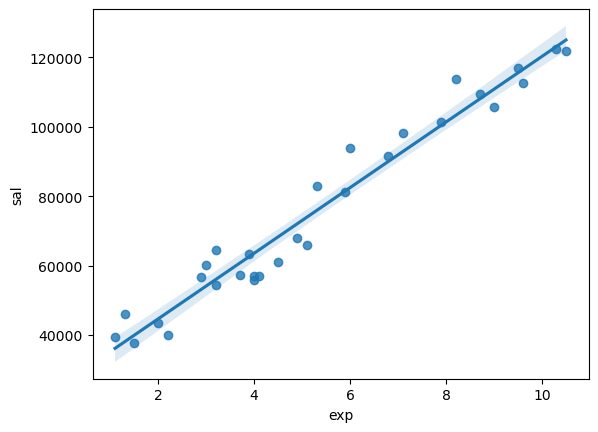

In [11]:
sns.regplot(df, x = 'exp', y = 'sal')

data is very linear

In [12]:
df.corr()

,exp,sal
exp,1.000000,0.978242
sal,0.978242,1.000000


There is very high correlation between both variables

In [13]:
model = LinearRegression()

In [14]:
x = df.exp[:, np.newaxis]
y = df.sal

C:\Users\harsh\AppData\Local\Temp\ipykernel_9996\899681121.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = df.exp[:, np.newaxis]


In [15]:
model.fit(x,y)

LinearRegression()

In [16]:
model.score(x,y)

0.9569566641435086

This model has very high accuracy

Lets see if we can get a better score with some transformations

In [17]:
ylog = np.log(y)

In [18]:
model.fit(x,ylog)

LinearRegression()

In [19]:
model.score(x,ylog)

0.9319671194084195

The score reduced

In [20]:
ylog2 = np.log2(y)

In [21]:
model.fit(x,ylog2)

LinearRegression()

In [22]:
model.score(x,ylog2)

0.9319671194084194

This did just as worse as applying natural log to the dependent variable

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss = StandardScaler()

In [26]:
yss = ss.fit_transform(y[:, np.newaxis])

C:\Users\harsh\AppData\Local\Temp\ipykernel_9996\3051272467.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  yss = ss.fit_transform(y[:, np.newaxis])


In [30]:
yss.shape

(30, 1)

In [38]:
yss = yss.reshape(-1)

In [40]:
model.fit(x,yss)

LinearRegression()

In [41]:
model.score(x,yss)

0.9569566641435086

Standardizing the dependent variable gives the same score as the raw data

The raw data gives the best score and no inferences can be made to transform the data to get a better score